# **Introduction**

The Consumer Price Index (CPI) is a measure of inflation, tracking changes in the prices of goods and services over time. It reflects the average expenditure of consumers and is used by policymakers, economists, and businesses to assess economic trends. CPI's components include a representative "market basket" of goods, weighted to reflect consumer spending patterns. In this project, we employ linear regression to model and predict CPI prices, leveraging historical data and economic indicators to develop accurate forecasts. This endeavor enhances understanding of inflation dynamics and offers practical insights for economic forecasting and decision-making.

This dataset represents time-series data of CPI values starting from the 1950's

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read in data, fix formatting as the dataset needed to be transposed and columns renamed
df = pd.read_csv('cpi_data.csv', header= None).transpose()
df.columns = df.iloc[0]
df = df[1:].set_index('variable')

df

,all_items_value,apparel_value,energy_value,food_value,gas_value,medical_value,transportation_value
variable,,,,,,,
1957-01-01,27.67,44.3,21.3,28.4,NaN,16.7,23.5
1957-02-01,27.8,44.3,21.4,28.7,NaN,16.7,23.7
1957-03-01,27.86,44.5,21.5,28.6,NaN,16.8,23.7
1957-04-01,27.93,44.4,21.6,28.6,NaN,16.9,23.8
1957-05-01,28.0,44.5,21.6,28.7,NaN,16.9,23.9
...,...,...,...,...,...,...,...
2022-03-01,287.708,127.044,305.469,295.809,380.763,588.223,341.104
2022-04-01,288.663,126.087,297.233,298.379,357.377,591.331,351.573
2022-05-01,291.474,126.927,308.839,301.879,372.063,593.887,356.018


## **Exploratory Data Analysis**

In [3]:
# what columns we are working with
df.columns

Index(['all_items_value', 'apparel_value', 'energy_value', 'food_value',
       'gas_value', 'medical_value', 'transportation_value'],
      dtype='object', name=0)

In [4]:
# find number of null values per column
df.isnull().sum()

0
all_items_value           0
apparel_value             0
energy_value              0
food_value                0
gas_value               120
medical_value             0
transportation_value      0
dtype: int64

In [5]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1957-01-01 to 2022-07-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   all_items_value       787 non-null    object
 1   apparel_value         787 non-null    object
 2   energy_value          787 non-null    object
 3   food_value            787 non-null    object
 4   gas_value             667 non-null    object
 5   medical_value         787 non-null    object
 6   transportation_value  787 non-null    object
dtypes: object(7)
memory usage: 49.2+ KB


In [6]:
# Shape of the dataset
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 787
Number of columns: 7


In [7]:
#  find dtypes of each column
print(df.dtypes[:])

# change dtype of each column into floats from objects
df = df.astype('float64')
print('New data types:', df.dtypes[:])

0
all_items_value         object
apparel_value           object
energy_value            object
food_value              object
gas_value               object
medical_value           object
transportation_value    object
dtype: object
New data types: 0
all_items_value         float64
apparel_value           float64
energy_value            float64
food_value              float64
gas_value               float64
medical_value           float64
transportation_value    float64
dtype: object


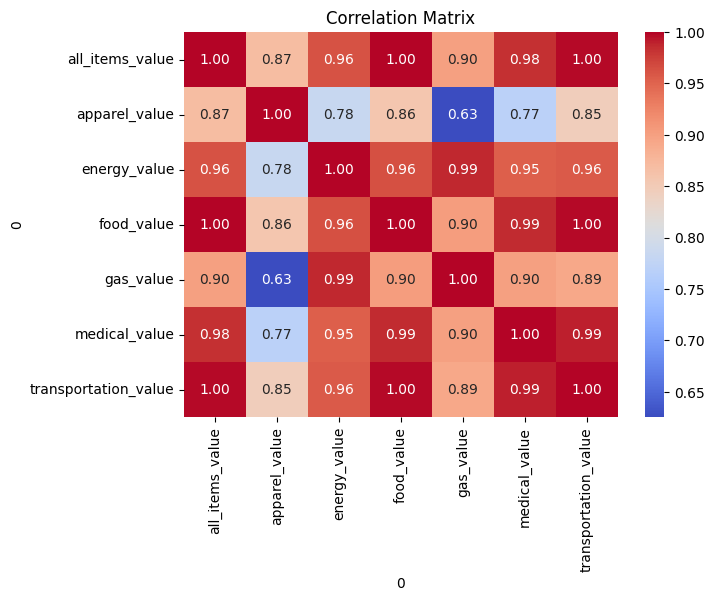

In [8]:
# plots a correlation matrix of the dataset
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

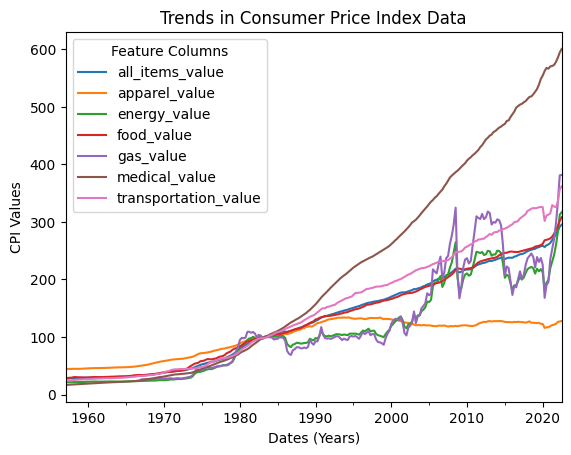

In [9]:
# plots resampled data using the mean from each quarter
df.index=pd.to_datetime(df.index)
quarterly_data = df.resample('Q').mean()
ax = quarterly_data.plot(title='Trends in Consumer Price Index Data')
plt.xlabel('Dates (Years)')
plt.ylabel('CPI Values')

legend = ax.legend()
legend.set_title('Feature Columns')

plt.show()

## **Feature Engineering and Data Cleaning**

- In the previous secton, we saw that the gas_value column is the only column containing null values. To address this inconsistency, we will fill in those null values with the mean value of all gas_values.

In [10]:

# filling in null values with the mean of that column
df = df.fillna(df['gas_value'].mean())
df

,all_items_value,apparel_value,energy_value,food_value,gas_value,medical_value,transportation_value
variable,,,,,,,
1957-01-01,27.670,44.300,21.300,28.400,133.560076,16.700,23.500
1957-02-01,27.800,44.300,21.400,28.700,133.560076,16.700,23.700
1957-03-01,27.860,44.500,21.500,28.600,133.560076,16.800,23.700
1957-04-01,27.930,44.400,21.600,28.600,133.560076,16.900,23.800
1957-05-01,28.000,44.500,21.600,28.700,133.560076,16.900,23.900
...,...,...,...,...,...,...,...
2022-03-01,287.708,127.044,305.469,295.809,380.763000,588.223,341.104
2022-04-01,288.663,126.087,297.233,298.379,357.377000,591.331,351.573
2022-05-01,291.474,126.927,308.839,301.879,372.063000,593.887,356.018


In [11]:
df.index

DatetimeIndex(['1957-01-01', '1957-02-01', '1957-03-01', '1957-04-01',
               '1957-05-01', '1957-06-01', '1957-07-01', '1957-08-01',
               '1957-09-01', '1957-10-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', name='variable', length=787, freq=None)

## Handles outliers by removing all rows having z-scores greater than 3

In [12]:
from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print('Number of rows:', df.shape[0]) # only removes 3 rows from dataset
print('Number of columns:', df.shape[1])

Number of rows: 784
Number of columns: 7


## **Regression Modeling**

- As seen from the graph plotting all of the cpi column values, each feature seems to be in a linear relationship with all_items_value so our model of choice will be linear regression.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# years and values
x = df[['apparel_value', 'energy_value', 'food_value', 'gas_value', 'medical_value', 'transportation_value']]
y = df['all_items_value']

# split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
# fit the model with training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

score = linear_regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')


# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Score:  0.9990485670136643
Accuracy: 99.90485670136643%
Mean Squared Error: 5.668621878809012


#Analyzing Results and Plotting

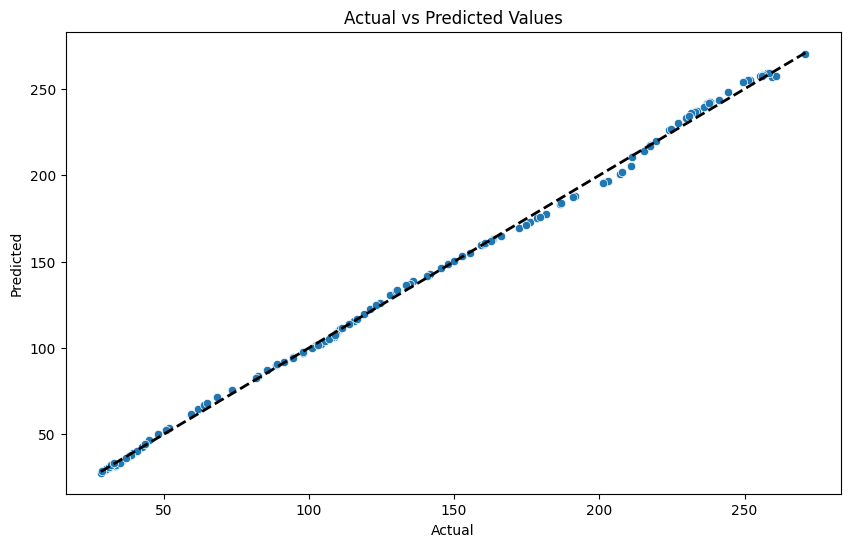

In [18]:
# Plotting test values versus the model's predicted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

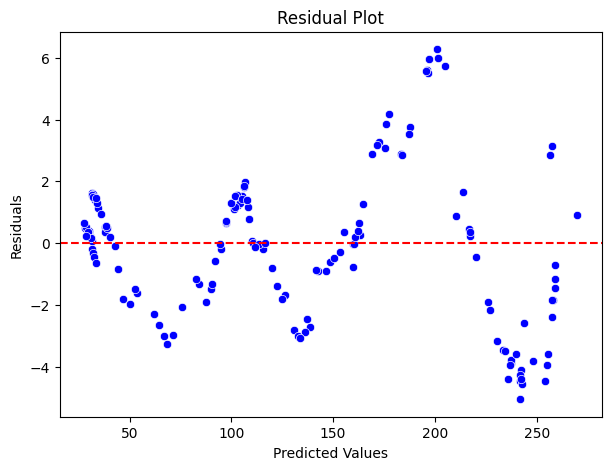

In [19]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [16]:
# find coefficients of model

print(f'Coefficient: {linear_regressor.coef_}')
print(f'Intercept: {linear_regressor.intercept_}')

Coefficient: [0.2028033  0.03467508 0.50620405 0.01993585 0.00365765 0.29096779]
Intercept: -6.732152498479792


#**Conclusions**

1) Our linear regression model received an accuracy of ~98-99% in predicting consumer price index values for the American economy.

2) The model had the following coefficients:
- Apparel: 0.203
- Energy: 0.035
- Food: 0.506
- Gas: 0.020
- Medical: 0.004
- Transportation: 0.291

3) Due to the linear trend of the data, our model had a very high accuracy with just multiple linear regression and without needing hyperparameter tuning. Our model shows that historically, food values have the strongest relationship to all items value, while medical and gas have the weakest relationship to all items value.